In [1]:
# from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras import backend as K
# from keras.models import Model
# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# import tensorflow as tf
# from tensorflow.python.tools import freeze_graph
# from tensorflow.python.tools import optimize_for_inference_lib
# from keras.optimizers import *
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
import os
# import theano
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
path = os.getcwd() + '\\data'
path1 = path + '\\images'
path2 = path + '\\images-resized'
path3 = path + '\\test-images'
path4 = path + '\\test-images-resized'

listing = os.listdir(path1)
predicting = os.listdir(path3)

num_samples = size(listing)
test_cases = size(predicting)

print('Training samples: ', num_samples)
print('Test cases: ', test_cases)

Training samples:  99
Test cases:  14


In [3]:
img_rows , img_cols = 28 , 28

for file in listing:
    im = Image.open(path1 + '\\' + file)
    img = im.resize((img_rows, img_cols))
    gray = img.convert('L')
    
    gray.save(path2 + '\\' + file, "JPEG" )

for file in predicting:
    im = Image.open(path3 + '\\' + file)
    img = im.resize((img_rows, img_cols))
    gray = img.convert('L')
    
    gray.save(path4 + '\\' + file, "JPEG" )

imlist = os.listdir(path2)
immatrix = array([array(Image.open(path2 + '\\' + im)).flatten() for im in imlist] , 'f')

testlist = os.listdir(path4)
testmatrix = array([array(Image.open(path4 + '\\' + im)).flatten() for im in testlist] , 'f')

# m, n = immatrix.shape[0:2]

In [15]:
label = np.ones((num_samples,), dtype = int64 )
label[0:9]=0
label[9:17]=1
label[17:28]=2
label[28:38]=3
label[38:48]=4
label[48:59]=5
label[59:68]=6
label[68:80]=7
label[80:88]=8
label[88:99]=9
print(label)

truth = np.ones((test_cases,), dtype = int64 )
truth[0]=9
truth[1]=6
truth[2]=2
truth[3]=9
truth[4]=8
truth[5]=7
truth[6]=2
truth[7]=6
truth[8]=3
truth[9]=5
truth[10]=5
truth[11]=4
truth[12]=3
truth[13]=1
print(truth)

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9]
[9 6 2 9 8 7 2 6 3 5 5 4 3 1]


(99, 784)
(99,)
(14, 784)
(14,)


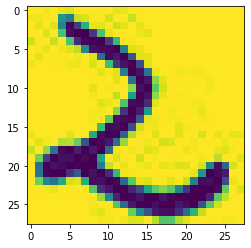

In [5]:
data, labels = shuffle(immatrix, label, random_state=4)
train_data = [data, labels]
print(train_data[0].shape)
print(train_data[1].shape)

# data, truths = shuffle(testmatrix, truth)
predict_data = [testmatrix, truth]
print(predict_data[0].shape)
print(predict_data[1].shape)

plt.imshow(train_data[0][26].reshape(img_rows, img_cols))
plt.imshow(predict_data[0][2].reshape(img_rows, img_cols))

In [21]:
# batch_size to train
batch_size = 32

# number of output classes
classes = 10

# number of epochs to train
epochs = 20

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

In [16]:
# (x, y) = (train_data[0], train_data[1])
# plt.imshow(x[67].reshape(img_rows, img_cols), cmap='gray')

x_train, x_test, y_train, y_test = train_test_split(train_data[0], train_data[1], test_size=0.2, random_state=4)
print(x_train.shape)
print( y_train.shape)

pred_test, pred_truth = predict_data[0], predict_data[1]
print(pred_test.shape)
print(pred_truth.shape)

(79, 784)
(79,)
(14, 784)
(14,)


In [17]:
# x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
# x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
# input_shape=(1, img_rows, img_cols)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
pred_test = pred_test.reshape(pred_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print(x_train.shape)
print(x_test.shape)
print(pred_test.shape)

(79, 28, 28, 1)
(20, 28, 28, 1)
(14, 28, 28, 1)


x_train shape:  (79, 28, 28, 1)
x_train samples:  79
x_test samples:  20
label :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


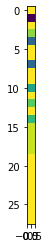

In [18]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
pred_test = pred_test.astype('float32') / 255

print('x_train shape: ', x_train.shape)
print('x_train samples: ', x_train.shape[0])
print('x_test samples: ', x_test.shape[0])

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, classes)
y_test = np_utils.to_categorical(y_test, classes)

i = 67
plt.imshow(x_train[i, 0], interpolation='nearest')
print("label : ", y_train[i,:])

In [19]:
model = Sequential()

model.add(Conv2D(32, (kernel_size, kernel_size), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (kernel_size, kernel_size), activation='relu'))
model.add(MaxPooling2D((pool_size, pool_size)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 79 samples, validate on 20 samples
Epoch 1/20
79/79 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 1.7387 - val_accuracy: 0.6500
Epoch 2/20
79/79 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 1.5403 - val_accuracy: 0.7000
Epoch 3/20
79/79 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9873 - val_loss: 1.6016 - val_accuracy: 0.7000
Epoch 4/20
79/79 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 1.6975 - val_accuracy: 0.7000
Epoch 5/20
79/79 [==============================] - 0s 2ms/step - loss: 0.0198 - accurac

Prediction : [9]


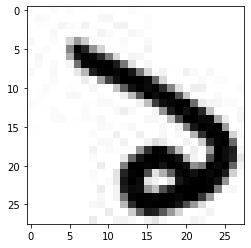

In [70]:
t = 13
prediction = model.predict_classes(pred_test[t:t+1])
plt.imshow(pred_test[t].reshape(img_rows, img_cols), cmap='gray')
print('Prediction :', prediction)